<html>
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>Rとの連携</h1>
	<p>
		Rはフリーの統計解析ソフトで、Sageのパッケージに付属しており、SageからRのコマンドを実行するための
		インターフェースも用意されています。
	</p>
	<p>
		Rの特徴に以下のものがあげられます。
		<ul>
			<li>強力な統計処理機能</li>
			<li>豊富なパッケージ群</li>
			<li>高い表現力を持つグラフ機能</li>
		</ul>
		
		SageからRのグラフ機能を使った例として、"R in action" で紹介されているグラフをSageで表示したSageのワークシート
		を<a href="http://www15191ue.sakura.ne.jp:8000/home/pub/14/">ここ</a>にアップしてありますので、
		参考にしてください。
	</p>
	<p>
		ここでは、SageからRのコマンドを使用する場合の注意点とRインタフェースの使用方法に説明します。
	</p>
</html>


In [ ]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/sage_table_form.css">

<html>
	<h2>Rのユーティリティ関数</h2>
	<p>
		SageからRのコマンドを使いやすくするために、以下のユーティリティ関数を用意、RUtil.pyに納めました。
		<ul>
			<li>preGraph(pdfFile): グラフ表示のコマンドを実行する前に実行し、出力デバイスを指定されたPDFファイルとし、pdfファイル名を返します</li>
			<li>offGraph: デバイスへの出力をオフにします（グラフの終了を意味します）</li>
			<li>postGraph(pdfFile): 指定されたPDFファイルを表示します</li>
			<li>getGraph(pdfFile): 指定されたPDFファイルを表示するIMGタグを返します</li>
			<li>printFile(name): 指定されたファイルをプリントします</li>
		</ul>
	</p>
	<p>
		load関数を使ってRUtil.pyを読み込みます。
	</p>
</html>

In [4]:
# RとPandasのデータフレームを相互に変換する関数を読み込む
# Rの必要なライブラリ
r('library(ggplot2)')
r('library(jsonlite)')

# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# sageユーティリティ
load('script/sage_util.py')
# Rユーティリティ
load('script/RUtil.py')

<html>
	<h2>Rインターフェース</h2>
	<p>
		Rとのインタフェースとして、r関数が提供されています。
		r関数では、Rのコマンドを文字列で与えます。Rのコマンド内でダブルクォートを使っている場合には、シングルクォートでくくり、
		Rのコマンド内でシングルクォートを使っている場合には、ダブルクォートを使って指定します。
<pre>
	r('Rのコマンド')
</pre>		
		RのコマンドにSageの変数の文字列を代入する場合には、以下のように%を使ってセットします。
<pre>
	r('Rのコマンド1%s, Rのコマンド2%s' % (変数1, 変数2))
</pre>	
		上記の例では、１番目の%sが変数1に、２番目の%sが変数2の値に置き換わります。	
	</p>
	<p>
		r関数の例として、Rで計算させた2のsqrtの結果を出力します。Rの出力では最初に[1]のように番号が付いて
		表示されます。
	</p>
</html>

In [5]:
# Rインターフェース
r('sqrt(2)')

[1] 1.414214

<html>
	<h2>複数行のコマンド</h2>
	<p>
		関数定義やRの制御コマンド（ループやif文等）を含む複数行のRコマンドをSageから実行する場合には、
		ファイルにまとめてワークシートにアップロードして使います。
	</p>
	<p>
		例でとして%%writefileコマンドを使って、data/mystats.txtに以下のように自乗を計算するx2関数を書いておきます。
	</p>
</html>

In [6]:
%%writefile data/mystats.txt
x2 <- function(x) {
    return (x^x)
}

Writing data/mystats.txt


<html>
	<h3>Rコマンドファイルの実行</h3>
	<p>
		ファイルに定義されたRのコマンドを読み込み評価するには、Rのsourceコマンドを使用します。
	</p>
	<p>
		以下の例では、mystats.txtに書かれたx2の関数定義を実行し、リストlの各要素に関数x2を適応しています。
	</p>
</html>

In [8]:
# Source関数でテキストファイルの内容を評価実行します
r('source("data/mystats.txt")')
# リストlの各要素に関数x2を適応する
r('l <- c(1, 2,  3)')
r('lapply(l, x2)')

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 27


<html>
	<h2>Sageから変数（リスト）をRに渡す</h2>
	<p>
		SageとRとの連携で重要なポイントはSageの変数をどうやってRに渡すかです。
	</p>
	<p>
		以下の例では、変数slに[1, 2, 3]のリストをセットし、これをr関数に渡しています。
		このままですとrlに返されるRElementオブジェクトの名前がSagexxのように自動で
		割り当てられてしまします。
	</p>
	<p>
		そこで、name関数でRにおける変数名を指定します。
<pre>
	rl = r(sl).name('l')
</pre>		
		説明でRの変数とSageの変数を混同しないようにRでの変数名をlとし、r関数の返した
		値をrl変数にセットします。
	</p>
	<p>
		出力結果から、r('l')で正しくslのリストがRに渡っていることが確認できます。
		また、rlのタイプは、sage.interfaces.r.RElementであり、その値の出力結果は
		r('l')と同じであることも確認できます。
	</p>
</html>

In [9]:
# Sageの変数（リスト）をRに渡す
sl = [1, 2, 3]
# RにSageの変数slを渡し、Rでの変数名をlとする
rl = r(sl).name('l')
print r('l')
print type(rl)
print rl

[1] 1 2 3
<class 'sage.interfaces.r.RElement'>
[1] 1 2 3


<html>
	<h2>SageからマトリックスをRに渡す</h2>
	<p>
		リストの次にRでよく使われるのがマトリックスです。
		例として、r.matrix関数を使って[1, 2, 3, 4]のリストから、2x2のマトリックスを作成します。
		byrow=Trueとすることで、Sageと同じ行単位での配置を指定しています。
		（RではFORTRANの影響で列単位で配列を保持しています）
	</p>
</html>

In [10]:
# マトリックスの生成も同様に生成後に名前をつけて代入すればよい
m = r.matrix([1, 2, 3, 4], 2, 2, byrow=True).name('m'); m

     [,1] [,2]
[1,]    1    2
[2,]    3    4

<html>
	<p>
		Rに定義された変数mの値を出力すると、上記の出力と同じことであることが確認できます。
	</p>
</html>

In [11]:
# rでも同じ変数名が定義される
r('m')

     [,1] [,2]
[1,]    1    2
[2,]    3    4

<html>
	<h2>RのマトリックスからSageのマトリックスへの変換</h2>
	<p>
		次にRのマトリックスをSageのマトリックスに変換する方法を示します。
	</p>
	<p>
		先に定義されたRのマトリックスmをsageobj関数を使ってSageのマトリックスに変換します。
		以下の例では、r('m')で返されたRElementをsageobjでSageの変数smに代入し、
		その値とタイプを確認しています。smは正しく変換され、smのタイプも
		sage.matrix.matrix_integer_dense.Matrix_integer_denseとなっていることが
		確認できます。
	</p>
</html>

In [12]:
# Rのマトリックス変数をsageの変数に変換する
print type(m)
sm = sageobj(m)
show(sm)
print type(sm)

<class 'sage.interfaces.r.RElement'>


[1 2]
[3 4]

<type 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>


<html>
	<h3>Sageのマトリックス変数からRのマトリックスへの変換</h3>
	<p>
		Sageの変数smからRのマトリックスに変換する場合には、listメソッドを使ってマトリックスsm
		をリストに変換し、smの行、sm列を使ってRのマトリックスに変換します。
	</p>
</html>

In [13]:
# Sage => Rの場合には、listメソッドでマトリックスからリストに変換する
r.matrix(sm.list(), sm.nrows(), sm.ncols(), byrow=True)

     [,1] [,2]
[1,]    1    2
[2,]    3    4

<html>
	<h2>文字列リストの変換</h2>
	<p>
		残念ながら、Sageの文字列リストは、そのままではRの文字列リストに変換されません。
		そこで、文字列リストをstr関数を使って文字列に変換し、最初[と最後の]を取り除いて、
		r('c(%s)'%文字列リスト)を使ってRの文字列リストに変換します。
	</p>
</html>

In [14]:
# 文字列のリストの場合には、上記の方法では上手くいかない
ary = ["a", "b"]
ss = str(ary)[1:-1]; print ss # リストを文字列に変換して[、]を取り除く
rary = r('c(%s)'%ss).name('rary')
print rary # Rに変換した配列
sary = sageobj(rary)
print sary # sageに戻した配列

'a', 'b'
[1] "a" "b"
['a', 'b']


<html>
	<h2>Rのプロット関数</h2>
	<p>
		Rのプロット関数を使う場合には、preGraphとpostGraphで挟むようにします。
	</p>
</html>

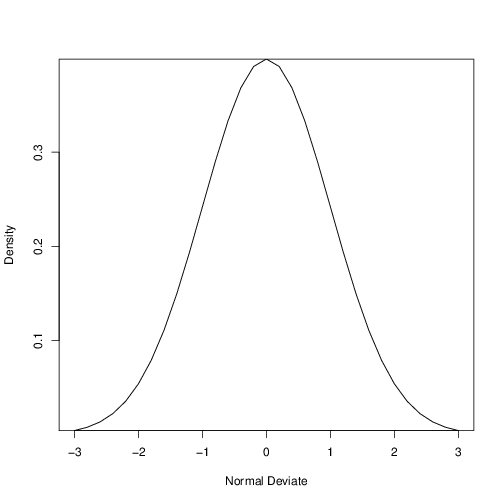

In [22]:
# 正規分布をRインターフェースを使って表示
graph = preGraph("images/ch12_fig1.pdf")
r('x <- pretty(c(-3,3), 30)')
r('y <- dnorm(x)')
r('plot(x, y, type = "l", xlab = "Normal Deviate", ylab = "Density", yaxs = "i")')
postGraph(graph)

<html>
	<h3>Rの関数を使ってSageでプロット</h3>
	<p>
		上記と同じことをRの関数dnormの値を使ってSageのplot関数でプロットした例を以下に示します。
	</p>
</html>

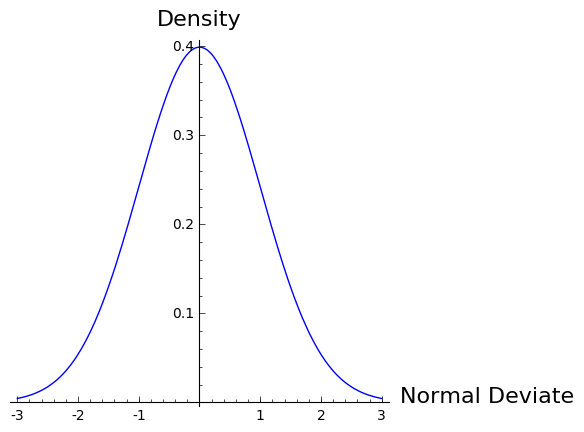

In [18]:
# 同じグラフをRと連携して表示した例（計算にRの関数を使用）
# Sage 6.7ではN()を使った数値化が失敗するため、sageobjを使ってrの戻り値を数値に変換
x = var('x')
f = lambda x: sageobj(r.dnorm(x))    # r.dnormを使ってRのdnorm関数を呼び出す
plot(f, [x, -3, 3], axes_labels=["Normal Deviate", "Density"], figsize=6)

<html>
	<h3>r.plot関数を使ったプロット</h3>
	<p>
		次に、r.plotを使ったプロットの例を示します。X軸にage、Y軸にweightを表示します。
		r.plotにX, Yにsageの変数age, weightを使った場合、軸ラベル名にsagexxのような
		名前が表示されます。
	</p>
</html>

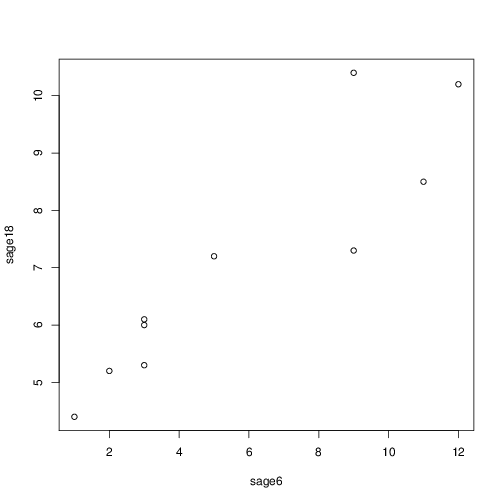

In [23]:
# グラフ表示(軸ラベルが正しく表示されていない)
age = [1,3,5,2,11,9,3,9,12,3]
weight = [4.4,5.3,7.2,5.2,8.5,7.3,6.0,10.4,10.2,6.1]
graph = preGraph("images/ch12_fig2.pdf")
r.plot(age, weight)
postGraph(graph)

<html>
	<h3>変数名を付けてr.plotでプロット</h3>
	<p>
		age, weightにnameコマンドでRの変数名をセットすると、軸ラベルがage, weightと
		表示されます。
	</p>
</html>

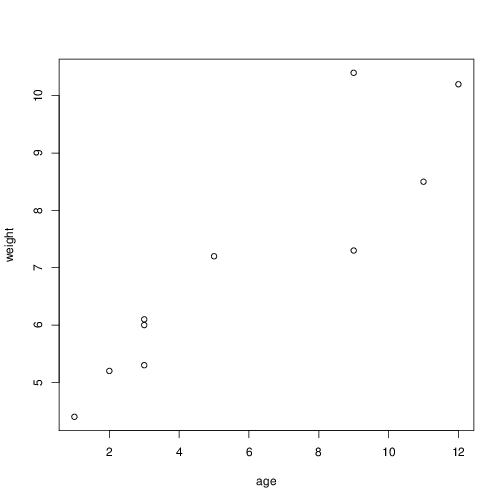

In [24]:
# データのセット
age = r([1,3,5,2,11,9,3,9,12,3]).name('age')
weight = r([4.4,5.3,7.2,5.2,8.5,7.3,6.0,10.4,10.2,6.1]).name('weight')
# グラフ表示
graph = preGraph("images/ch12_fig3.pdf")
r.plot(age, weight)
postGraph(graph)

<html>
	<h3>plotのオプションを指定</h3>
	<p>
		Rのplot関数にタイトル等のオプションを指定する場合には、r関数を使って以下のように表示します。
	</p>
</html>

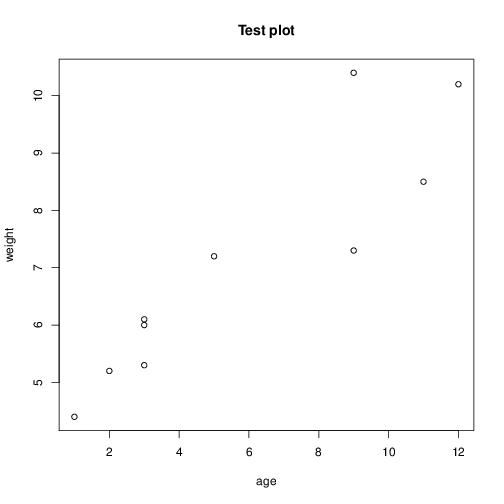

In [26]:
# タイトル等グラフオプションを指定する場合には、r.plotではなくr関数を使用する
graph = preGraph("images/ch12_fig4.pdf")
# r('par(family="Japan1Ryumin")')
r("plot(age, weight, main='Test plot')")
postGraph(graph)

<html>
	<h2>データファイルからの集計</h2>
	<p>
		Rの得意とする集計処理を以下のようなデータファイルを読み込み、
		クロス集計を作成してみましょう。
	</p>
</html>

In [27]:
%%writefile data/ch12_data.txt
diabetes    status
Type1    Poor
Type2    Improved
Type1    Excellent
Type1    Poor

Writing data/ch12_data.txt


<html>
	<h3>データファイルの読み込み</h3>
	<p>
		データファイルの読み込みは、Rのread.table関数を使用します。
		header=Tを付けて、１行目がヘッダであり、
		１列目がdiabetes、２行目がstatusと名前付けします。
	</p>
</html>

In [29]:
# データファイルの読み込み
d = r("d<-read.table('data/ch12_data.txt', header=T)") ; d


  diabetes    status
1    Type1      Poor
2    Type2  Improved
3    Type1 Excellent
4    Type1      Poor

<html>
	<h3>クロス集計</h3>
	<p>
		クロス集計には、table関数を使用し、データセットdの変数、
		diabetes, statusを指定します。
	</p>
</html>

In [30]:
# クロス集計
r('table(d$diabetes, d$status)')

       
        Excellent Improved Poor
  Type1         1        0    2
  Type2         0        1    0